## Bike Rental
### 1.Descriptive Statistics

In [1]:
import pandas as pd
df = pd.read_csv('Bike_Rental_data.csv')

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_16448\3459477975.py:2: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Bike_Rental_data.csv')


In [2]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100576 entries, 0 to 100575
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   instant     100576 non-null  float64
 1   dteday      100576 non-null  object 
 2   season      100576 non-null  object 
 3   yr          100576 non-null  object 
 4   mnth        100576 non-null  object 
 5   hr          100576 non-null  float64
 6   holiday     100576 non-null  object 
 7   weekday     100576 non-null  float64
 8   workingday  100576 non-null  object 
 9   weathersit  100576 non-null  object 
 10  temp        100576 non-null  object 
 11  atemp       100576 non-null  object 
 12  hum         100576 non-null  object 
 13  windspeed   100576 non-null  object 
 14  casual      100576 non-null  object 
 15  registered  100576 non-null  object 
 16  cnt         100576 non-null  float64
dtypes: float64(4), object(13)
memory usage: 13.0+ MB


In [4]:
df.describe()

,instant,hr,weekday,cnt
count,100576.000000,100576.000000,100576.000000,100576.000000
mean,8688.878771,11.552431,3.002402,189.332859
std,5019.386012,6.921326,2.008345,181.247215
min,0.987460,-0.037539,-0.040162,0.976830
25%,4345.006095,5.986351,1.006304,39.998170
50%,8686.993279,11.986028,3.000195,141.998595
75%,13038.998690,17.983380,4.993783,280.989003
max,17379.006830,23.037515,6.039560,977.012922


### 2. handle missing values

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Numerical → median
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Categorical → mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

### 3.Handle Errors / Invalid Values

In [7]:
import numpy as np

df.replace('?', np.nan, inplace=True)

### 4.Distribution Analysis

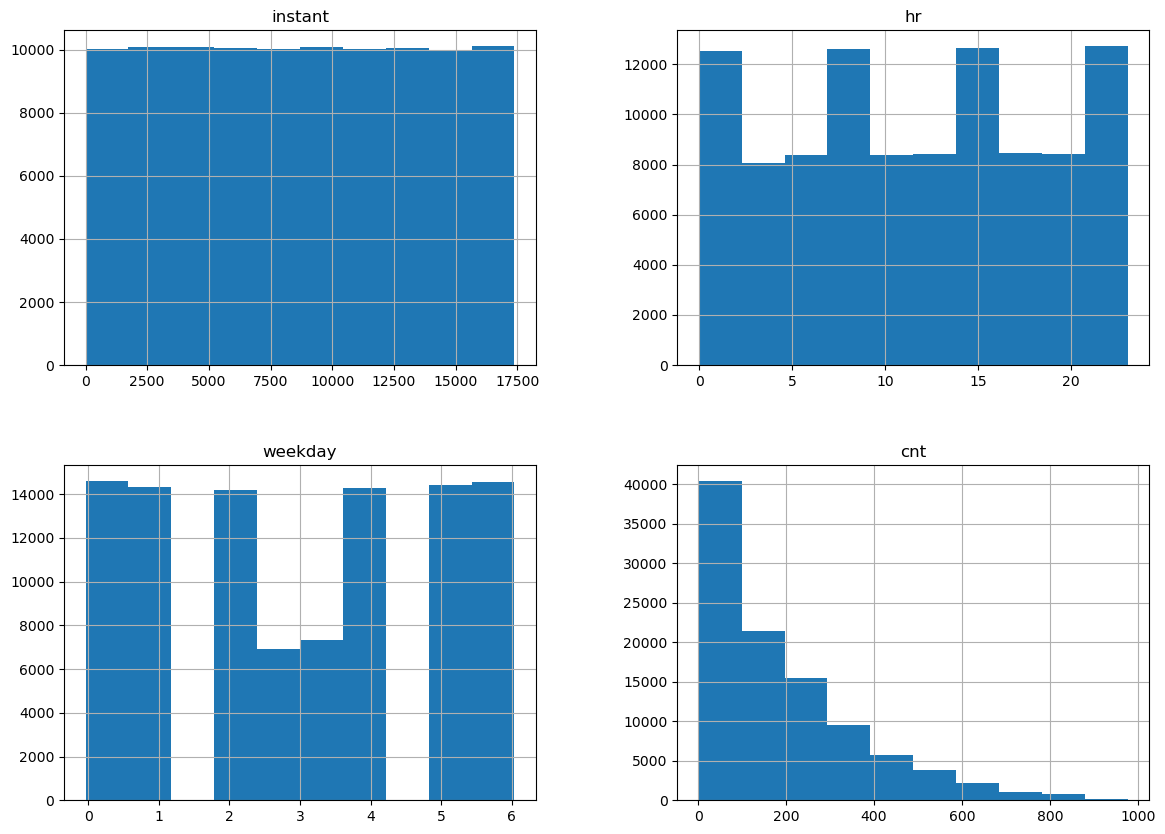

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

df[num_cols].hist(figsize=(14,10))
plt.show()


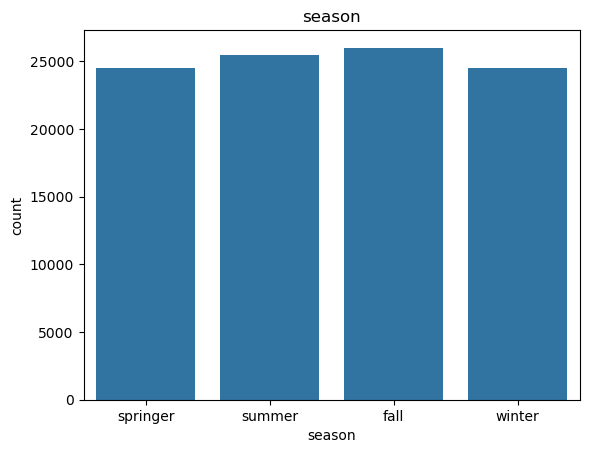

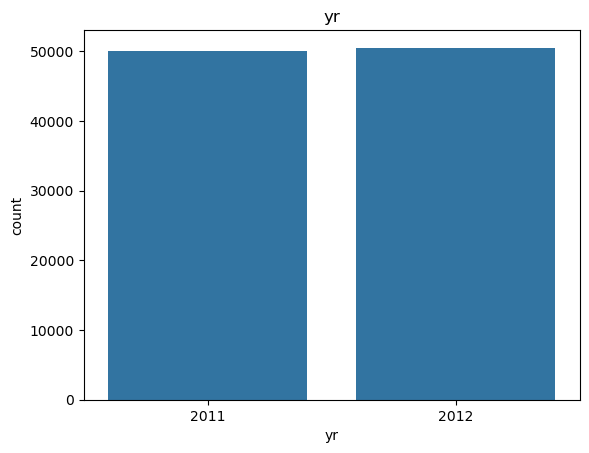

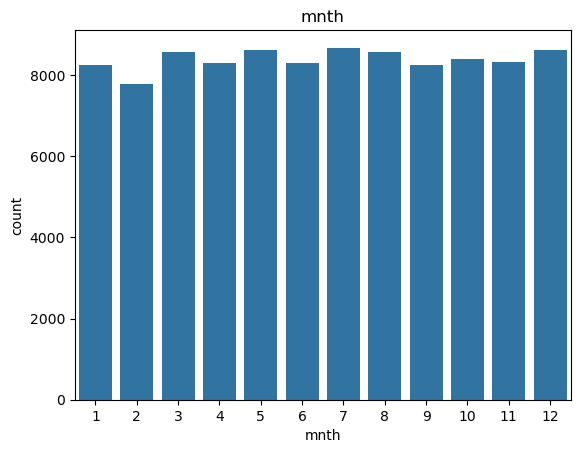

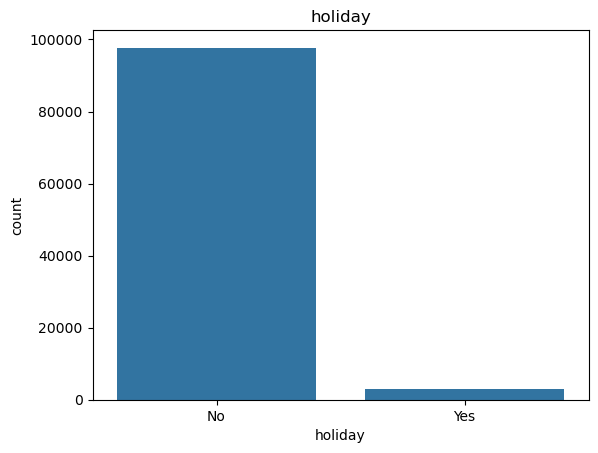

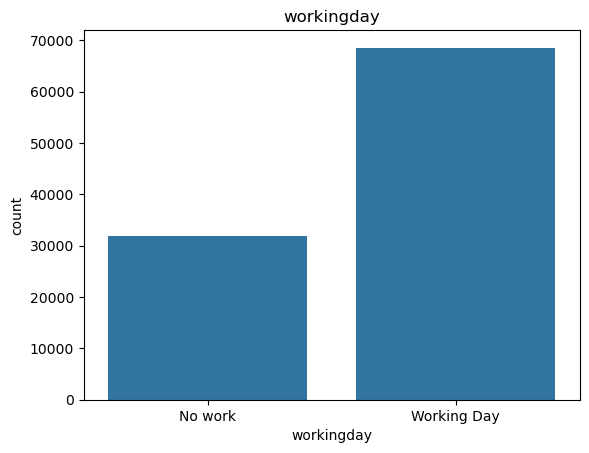

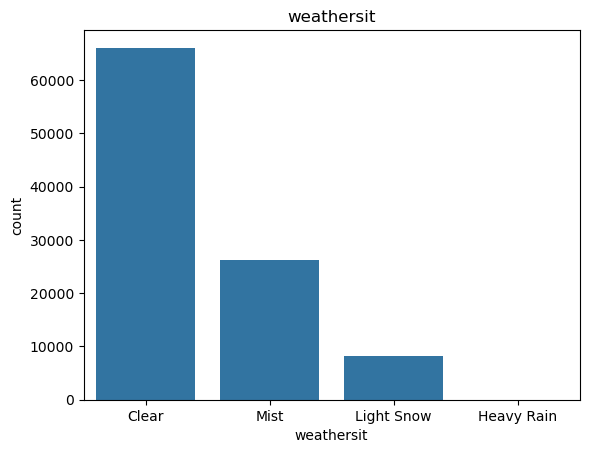

In [9]:

cat_features = ['season','yr','mnth','holiday','workingday','weathersit']

for col in cat_features:
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.show()
#'hr','weekday',


### 5.Correlation Matrix & Heatmap

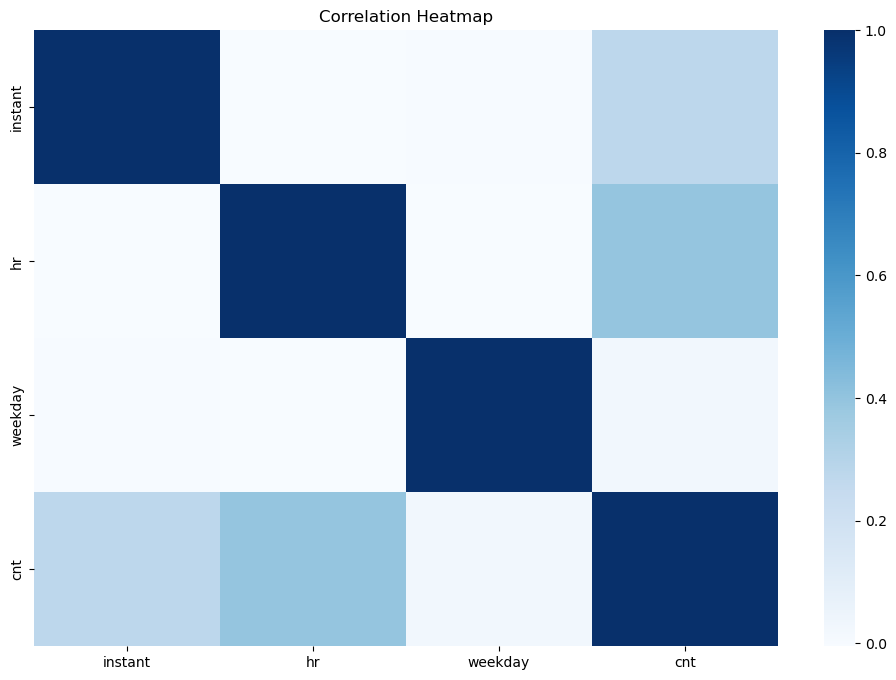

In [10]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), cmap='Blues', annot=False)
plt.title("Correlation Heatmap")
plt.show()

### 6.Hypothesis Testing

In [11]:
from statsmodels.stats.weightstats import ztest

rental_counts = df['cnt']

z_stat, p_val = ztest(rental_counts, value=500)

print("Z-Test statistic:", z_stat)
print("P-value:", p_val)

if p_val < 0.05:
    print("Reject null hypothesis: Mean bike rentals is significantly different from 500")
else:
    print("Fail to reject null hypothesis: No significant difference from 500")

Z-Test statistic: -543.5896244942444
P-value: 0.0
Reject null hypothesis: Mean bike rentals is significantly different from 500


### 7.one hot encoding

In [12]:
X = df.drop(['cnt','dteday'], axis=1)
y = df['cnt']

X = pd.get_dummies(X, drop_first=True)

df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0.992410,1/1/2011,springer,2011,1,-0.009452,No,5.990616,No work,Clear,0.24,0.2879,0.81,0,3,13,15.999019
1,2.004157,1/1/2011,springer,2011,1,1.007925,No,5.996162,No work,Clear,0.22,0.2727,0.8,0,8,32,40.004970
2,2.984610,1/1/2011,springer,2011,1,1.993083,No,6.004768,No work,Clear,0.22,0.2727,NaN,0,5,27,32.004786
3,3.993251,1/1/2011,springer,2011,1,2.991451,No,5.980473,No work,Clear,0.24,0.2879,0.75,0,3,10,12.999856
4,4.990763,1/1/2011,springer,2011,1,4.024688,No,5.984412,No work,Clear,0.24,0.2879,0.75,0,0,1,1.002089


### 8.Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 9.Train–Test Split

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

### 10. Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

### 11. Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Use same features as linear regression (ONLY numeric continuous)
num_cols = ['temp', 'atemp', 'hum', 'windspeed']
X_num = df[num_cols]
y = df['cnt']

# Handle '?' and missing values (safe)
X_num.replace('?', np.nan, inplace=True)
X_num = X_num.apply(pd.to_numeric, errors='coerce')
X_num.fillna(X_num.median(), inplace=True)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Train-test split
from sklearn.model_selection import train_test_split
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

# Train model
poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)

# Predictions
y_pred_poly = poly_model.predict(X_test_p)

C:\Users\Bhavani\AppData\Local\Temp\ipykernel_16448\3850969947.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_num.replace('?', np.nan, inplace=True)


### 12.Ridge regression

In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

### 13.lasso Regression

In [18]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()


In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
lasso = Lasso(alpha=0.01, max_iter=5000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)     

### 14. RidgeCV and LassoCV

In [21]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas = np.arange(0.1, 1, 0.5) 

model = RidgeCV(alphas=alphas)
model.fit(X_train_scaled, y_train)

print("Best alpha:", model.alpha_)

y_pred_tr = model.predict(X_train_scaled)
y_pred_te = model.predict(X_test_scaled)

print("r2-train:", r2_score(y_train, y_pred_tr))
print("r2-test :", r2_score(y_test, y_pred_te))



Best alpha: 0.1
r2-train: 0.9999850341147476
r2-test : 0.9999894679071487


In [22]:
from sklearn.linear_model import LassoCV
 
alphas=np.arange(0.1,1,0.5)
 
model=LassoCV(alphas=alphas)
 
model.fit(X_train_scaled, y_train)
print(model.alpha_)
y_pred_tr = model.predict(X_train_scaled)
y_pred_te = model.predict(X_test_scaled)
print("r2-train : ",r2_score(y_train,y_pred_tr))
print("r2-test : ",r2_score(y_test,y_pred_te))

0.1
r2-train :  0.9981508788949449
r2-test :  0.9978540716736564


### 15. evaluation metrics

In [23]:
def metrics(y_true, y_pred, name):
    print(name)
    print("R2 :", r2_score(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("-"*30)

metrics(y_test, y_pred_lr, "Linear Regression")
metrics(y_test_p, y_pred_poly, "Polynomial Regression")
metrics(y_test, y_pred_lasso, "Lasso Regression")
metrics(y_test, y_pred_ridge, "Ridge Regression")

Linear Regression
R2 : 0.9999894966681743
MSE: 0.3457761824855514
RMSE: 0.5880273654223512
MAE: 0.06471839584600776
------------------------------
Polynomial Regression
R2 : 0.27805636262704325
MSE: 23766.831234285466
RMSE: 154.16494813765374
MAE: 115.02202859792695
------------------------------
Lasso Regression
R2 : 0.9996045177060702
MSE: 13.019521815001708
RMSE: 3.6082574485479424
MAE: 0.7484086544088557
------------------------------
Ridge Regression
R2 : 0.9999891269625617
MSE: 0.35794711999991147
RMSE: 0.598286820847586
MAE: 0.06911332148652462
------------------------------
